<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/Integrating_XAI_to_RGB_VIT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Integrating LIME

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=91bdd9cd8fdbd302a007ee4200637bfe4f685fe3c648c5e21dbdee2ec7106e9c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


1. Applying LIME to a Glioblastoma Tumor Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Glioblastoma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━

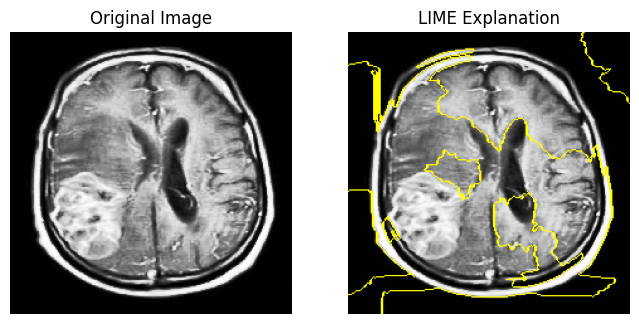

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/ViT_model_RGBFinal.keras'
hybrid_model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

# Define image preprocessing function
def preprocess_image(img_path):
    """Load and preprocess an image for model prediction."""
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

# Load a test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"
test_image = preprocess_image(test_image_path)

test_image_exp = np.expand_dims(test_image, axis=0)

# Prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)  # Convert list to NumPy array
    return hybrid_model.predict(images)  # Get model predictions

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


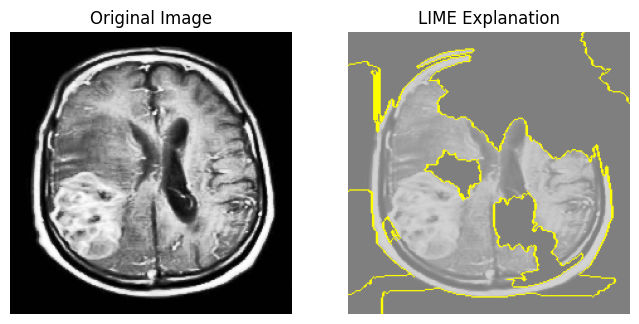

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

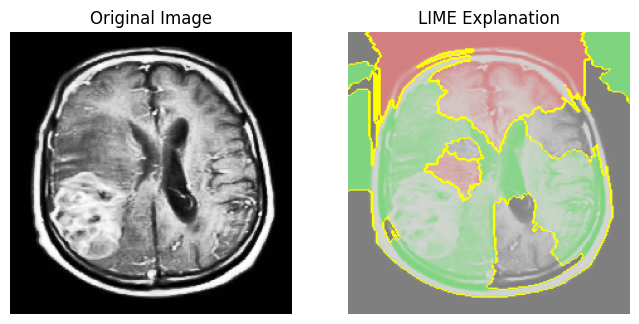

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

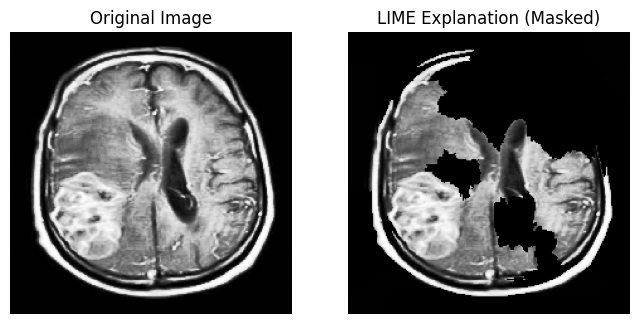

In [ ]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()

2. Applying Grad-CAM

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class probabilities: [-6.253705   -5.081249   -6.7078     -3.5602114  -9.111107    8.805847
 -9.483711   -5.186061   -2.2432477  -0.16864924 -4.469091   -5.6484065
 -4.8843594   0.481904    2.5217078  -8.402537  ]
Heatmap shape before reshaping: (9,)


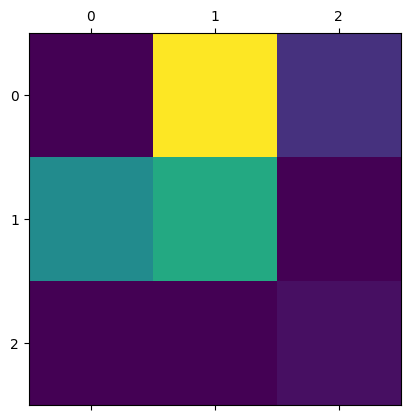

<ipython-input-23-735f750fb4bf>:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


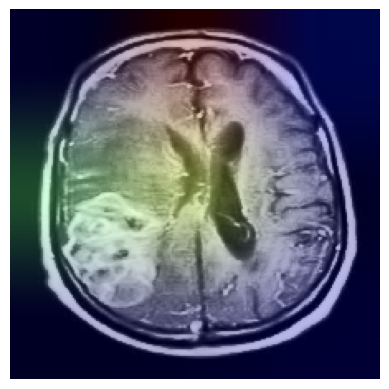

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.preprocessing import image

def get_img_array(img_path, size=(224, 224)):

    img = image.load_img(img_path, target_size=size)  # Resize image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array


def gradcam_heatmap(img_array, model, last_layer_name, pred_index=None):

    # Define a model that maps input to activations of the target layer and output predictions
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(last_layer_name).output, model.output]
    )

    # Compute gradients of predicted class with respect to activations
    with tf.GradientTape() as tape:
        last_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])  # Choose highest probability class
        class_channel = preds[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, last_layer_output)

    # Global average pooling of gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # Compute Grad-CAM heatmap
    heatmap = last_layer_output @ pooled_grads[..., tf.newaxis]  # Weighted sum
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


def display_gradcam(img, heatmap, alpha=0.4):
    """
    Overlays Grad-CAM heatmap on original image.
    """
    # Rescale heatmap to 0-255
    heatmap = np.uint8(255 * heatmap)

    # Apply jet colormap
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]  # RGB values
    jet_heatmap = jet_colors[heatmap]

    # Resize heatmap to image size
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose heatmap on image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Display result
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()


# Load trained ViT model
model_path = "/content/drive/MyDrive/dsgp_models/ViT_model_RGBFinal.keras"
vit_classifier = keras.models.load_model(model_path)

# Select layer for Grad-CAM
last_layer_name = "layer_normalization_3"

# Load and preprocess test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"  # 🔹 Provide the actual image path here
img_array = get_img_array(test_image_path)

# Disable softmax (needed for Grad-CAM)
vit_classifier.layers[-1].activation = None

# Predict class
preds = vit_classifier.predict(img_array)
print(f"Predicted class probabilities: {preds[0]}")

# Generate Grad-CAM heatmap
heatmap = gradcam_heatmap(img_array, vit_classifier, last_layer_name)

# Reshape heatmap for visualization
print("Heatmap shape before reshaping:", heatmap.shape)
heatmap = heatmap.reshape(int(np.sqrt(heatmap.size)), -1)   # Adjust dimensions if needed

# Display heatmap
plt.matshow(heatmap)
plt.show()

# Overlay heatmap on original image
display_gradcam(image.img_to_array(image.load_img(test_image_path)), heatmap)


In [24]:
layer_names=[layer.name for layer in vit_classifier.layers]
layer_names

['input_layer',
 'conv2d',
 'reshape',
 'layer_normalization',
 'multi_head_attention',
 'add_1',
 'layer_normalization_1',
 'dense',
 'dense_1',
 'add_2',
 'layer_normalization_2',
 'multi_head_attention_1',
 'add_3',
 'layer_normalization_3',
 'dense_2',
 'dense_3',
 'add_4',
 'layer_normalization_4',
 'multi_head_attention_2',
 'add_5',
 'layer_normalization_5',
 'dense_4',
 'dense_5',
 'add_6',
 'layer_normalization_6',
 'multi_head_attention_3',
 'add_7',
 'layer_normalization_7',
 'dense_6',
 'dense_7',
 'add_8',
 'layer_normalization_8',
 'multi_head_attention_4',
 'add_9',
 'layer_normalization_9',
 'dense_8',
 'dense_9',
 'add_10',
 'layer_normalization_10',
 'global_average_pooling1d',
 'dense_10',
 'dropout_5',
 'dense_11']